In [1]:
import tensorflow as tf
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from skimage import feature # This pacakge is used for LBP feature extraction
from sklearn import metrics
import seaborn as sns # This pacakge is used for better visualization of data (e.g confusion matrix)

%load_ext tensorboard

In [2]:
from tensorflow import keras
print(tf.__version__)


2.13.1


In [3]:
import os
from os.path import isfile, join
import re


mypath = 'dataset_42028assg1_13918471'
categories = ['!', ')', '[', '+', '=', 'cos', 'div', 'sum', 'tan', 'times']
dataset = []
img_index_arr = []
# files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

def load_data():
    for category in categories:
        path = os.path.join(mypath, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img),0)
                new_array = cv2.resize(img_array, (28,28))
                dataset.append(new_array)
                img_index_arr.append(class_num)
            except Exception as e:
                print(e)


In [4]:
load_data()

!
)
+
sum


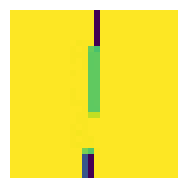

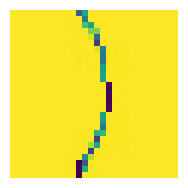

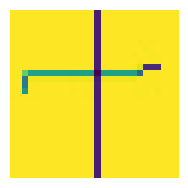

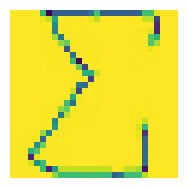

In [5]:
datasetArr = np.array(dataset)

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.axis('off')
ax1.imshow(dataset[0])
print(categories[img_index_arr[0]])

fig = plt.figure()
ax1 = fig.add_subplot(2,2,2)
ax1.axis('off')
ax1.imshow(dataset[500])
print(categories[img_index_arr[500]])

fig = plt.figure()
ax1 = fig.add_subplot(2,2,3)
ax1.axis('off')
ax1.imshow(dataset[1500])
print(categories[img_index_arr[1500]])

fig = plt.figure()
ax1 = fig.add_subplot(2,2,4)
ax1.axis('off')
ax1.imshow(dataset[3500])
print(categories[img_index_arr[3500]])


In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(datasetArr, img_index_arr) 


In [104]:
print("Extracting features from training dataset...")
data_train = []
labels_train = []

# loop over the training images
for img_index in range(len(X_train)):
  # load the image, and extract HOG features
  image = (X_train[img_index])
  #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  H = feature.hog(image, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")

  # update the data and labels
  data_train.append(H)
  labels_train.append(Y_train[img_index])

print(np.shape(data_train))
print(np.shape(labels_train))

Extracting features from training dataset...
(3750, 36)
(3750,)


In [97]:
print("Extracting features from training dataset...")
data_test = []
labels_test = []

# loop over the training images
for img_index in range(len(X_test)):
  # load the image, and extract HOG features
  image = (X_test[img_index])
  #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  H = feature.hog(image, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")

  # update the data and labels
  data_test.append(H)
  labels_test.append(Y_test[img_index])

print(np.shape(data_test))
print(np.shape(labels_test))

Extracting features from training dataset...
(1250, 36)
(1250,)


In [107]:
X_train = data_train
Y_train = labels_train
X_test = data_test
Y_test = labels_test

In [108]:
X_val = np.array(X_train[:500])
Y_val = np.array(Y_train[:500]) 

X_train = np.array(X_train [500:])
Y_train = np.array(Y_train [500:])

X_test = np.array(X_test)
Y_test = np.array(Y_test)



In [110]:
# plt.imshow(data_train[0])

print(np.shape(X_train))
print(np.shape(Y_train))
print(np.shape(X_val))
print(np.shape(X_test))

(3250, 36)
(3250,)
(500, 36)
(1250, 36)


In [117]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[36]),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [118]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H=model.fit(X_train, Y_train, epochs=13,validation_data=(X_val, Y_val))

Epoch 1/13
102/102 [==============================] - 1s 3ms/step - loss: 1.9634 - accuracy: 0.5523 - val_loss: 1.5664 - val_accuracy: 0.6740
Epoch 2/13
102/102 [==============================] - 0s 2ms/step - loss: 1.1829 - accuracy: 0.7597 - val_loss: 0.9383 - val_accuracy: 0.8080
Epoch 3/13
102/102 [==============================] - 0s 2ms/step - loss: 0.7834 - accuracy: 0.8160 - val_loss: 0.7099 - val_accuracy: 0.8100
Epoch 4/13
102/102 [==============================] - 0s 1ms/step - loss: 0.6329 - accuracy: 0.8329 - val_loss: 0.6036 - val_accuracy: 0.8200
Epoch 5/13
102/102 [==============================] - 0s 1ms/step - loss: 0.5516 - accuracy: 0.8431 - val_loss: 0.5447 - val_accuracy: 0.8260
Epoch 6/13
102/102 [==============================] - 0s 1ms/step - loss: 0.5024 - accuracy: 0.8566 - val_loss: 0.4985 - val_accuracy: 0.8460
Epoch 7/13
102/102 [==============================] - 0s 1ms/step - loss: 0.4670 - accuracy: 0.8606 - val_loss: 0.4689 - val_accuracy: 0.8460
Epoch 

In [119]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 36)                0         
                                                                 
 dense_18 (Dense)            (None, 128)               4736      
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 6026 (23.54 KB)
Trainable params: 6026 (23.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


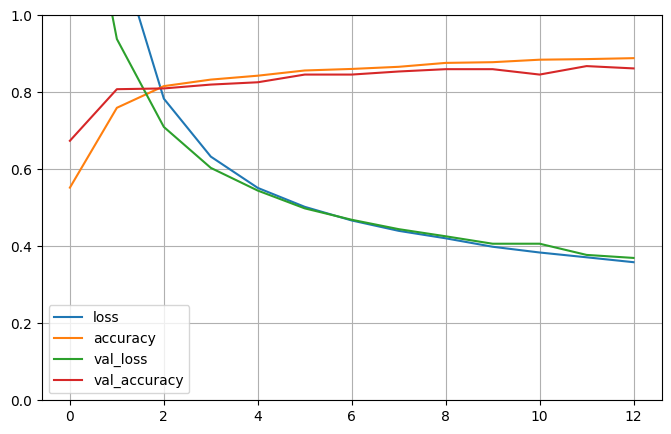

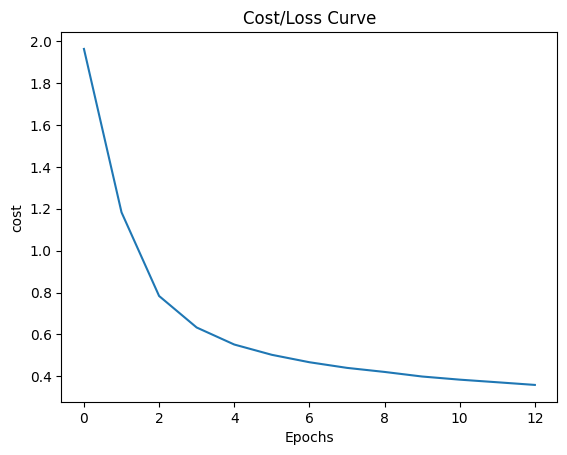

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(H.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

plt.plot(H.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

In [121]:
model.evaluate(X_test, Y_test)

40/40 [==============================] - 0s 899us/step - loss: 0.3516 - accuracy: 0.8960


[0.35161396861076355, 0.8960000276565552]